In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import string
import operator

# Figure 1 in paper

### Survivorship curves for mutant in the wild and in the laboratory, and hypothetical wild type in the wild

Mean number of mutant individuals in captvity left at Tmax_C:  6.37
Mean number of mutant individuals left at Tmax_W:  17.04
Mean number of wildtype individuals left at Tmax_WT:  17.4


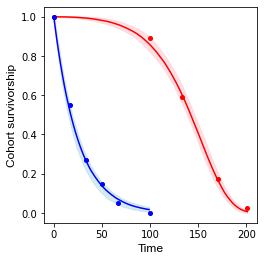

In [42]:
#Calculating survivorship curves for mutant captive Frontinella, mutant wild Frontinella  + stipulated hypothetical wildtype Frontinella

# Maximal lifespans (denoted as t_m in the paper)
Tmax_C = 202 #217
Tmax_W = 100
Tmax_WT = 100

nind = 1000 # number of individuals in the initial cohort
nrepeats = 100 #number of time the cohort model is run

# alpha and kappa were found by previous simple least-squares fitting
alpha = 0.000222 
kappa = 0.033 

# These two mortality risk constants were found by previous simple least-squares fitting (see paper for details)
p_wt_wt = 0.04015625 # p_(t) is denoted as h_(t) in the paper
p_wt_mut = 0.04015625 

epsilon = 0.04 


# Cohort survivorship in the protected environment
mut_C = np.zeros((nrepeats,Tmax_C),dtype = int)
for k in range(nrepeats):
    s = np.ones((Tmax_C,nind),dtype = int); 
    for j in range(1,Tmax_C):
        for i in range(nind):
            ran = np.random.rand(1)
            if s[j-1,i] == 1:
                if ran < alpha*(((1+kappa)**(j+1))-1):
                    s[j,i] = 0
            if s[j-1,i] == 0:
                s[j,i] = 0
    mut_C[k,:] = np.sum(s, axis = 1)

mean_mut_C = np.mean(mut_C,axis = 0)

# Cohort survivorship mutant in the wild
mut_W = np.zeros((nrepeats,Tmax_W),dtype = int)
for k in range(nrepeats):
    s = np.ones((Tmax_W,nind),dtype = int); 
    for j in range(1,Tmax_W):
        for i in range(nind):
            ran = np.random.rand(1)
            if s[j-1,i] == 1:
                if ran < (1-epsilon)*p_wt_mut + alpha*(((1+kappa)**(j+1))-1):
                    s[j,i] = 0
            if s[j-1,i] == 0:
                s[j,i] = 0
    mut_W[k,:] = np.sum(s, axis = 1)
mean_mut_W = np.mean(mut_W,axis = 0)

# Cohort survivorship for hypothetical wildtype based on mutant parameter values
# with constant p_wt found by least squares fitting
hyp_wt = np.zeros((nrepeats,Tmax_WT),dtype = int); 
for k in range(0,nrepeats):
    s = np.ones((Tmax_WT,nind),dtype = int); 
    for j in range(1,Tmax_WT):
        for i in range(nind):
            ran = np.random.rand(1)
            if (s[j-1,i] == 1):
                if ran < p_wt_wt:
                    s[j,i] = 0
            if (s[j-1,i] == 0):
                s[j,i] = 0
    hyp_wt[k,:] = np.sum(s, axis = 1) 
mean_hyp_wt = np.mean(hyp_wt,axis = 0)

# Recording
print('Mean number of mutant individuals in captvity left at Tmax_C: ',mean_mut_C[Tmax_C-1])
print('Mean number of mutant individuals left at Tmax_W: ',mean_mut_W[Tmax_W-1])
print('Mean number of wildtype individuals left at Tmax_WT: ',mean_hyp_wt[Tmax_WT-1])

# Normalize + calculate stds
mean_mut_C = mean_mut_C*(1/nind)
std_mut_C = np.std(mut_C*(1/nind),axis = 0)
mean_mut_W = mean_mut_W*(1/nind)
std_mut_W = np.std(mut_W*(1/nind),axis = 0)
mean_hyp_wt = mean_hyp_wt*(1/nind)
std_hyp_wt = np.std(hyp_wt*(1/nind),axis = 0)

# Plotting
C1 = np.arange(0,Tmax_C,1,dtype = int)
C2 = np.arange(0,Tmax_W,1,dtype = int)
C3 = np.arange(0,Tmax_WT,1,dtype = int)

fig1,ax = plt.subplots(figsize=(6,6))
ax.plot(C1,mean_mut_C,'r-')
ax.fill_between(range(Tmax_C), mean_mut_C-3.0*std_mut_C, mean_mut_C+3.0*std_mut_C, color='pink', alpha = 0.5)
ax.plot(C2,mean_mut_W,'b-')
#plt.plot(C3,mean_wt,'g-')
ax.fill_between(range(Tmax_WT), mean_hyp_wt-3.0*std_wt, mean_hyp_wt+3.0*std_hyp_wt, color = 'lightblue', alpha = 0.5);

#Data extracted from Austad (1989)
#Laboratory
#plt.plot(0, 1.0,'o')
#plt.plot(30*217/65, 0.8895,'ro')
#plt.plot(40*217/65, 0.592,'ro')
#plt.plot(51*217/65, 0.174,'ro')
#plt.plot(60*217/65, 0.0239,'ro')

X_C = [0,30*217/65,40*217/65,51*217/65,60*217/65]
Y_C = [1.0,0.8895,0.592,0.174,0.0239]
ax.plot(X_C,Y_C,'ro',markersize=4)

X_W = [0,5*100/30,10*100/30,15*100/30,20*100/30,30*100/30]
Y_W = [1.0,0.5498,0.268,0.148,0.05,0.0]
ax.plot(X_W,Y_W,'bo',markersize=4)

#Data extracted from Austad (1989)
#Wild
#plt.plot(0, 1.0,'bo')
#plt.plot(5*100/30, 0.5498,'bo')
#plt.plot(10*100/30, 0.268,'bo')
#plt.plot(15*100/30, 0.148,'bo')
#plt.plot(20*100/30, 0.05,'bo')
#plt.plot(25*100/30, 0.0016,'bo')
#plt.plot(30*100/30, 0.0,'bo')

afont = {'fontname':'Arial'}
ax.set_xlabel("Time",fontsize = 12,**afont)
ax.set_ylabel("Cohort survivorship",fontsize = 12,**afont);

x_size = 10
plt.rc('xtick',labelsize=x_size)
y_size = 10
plt.rc('ytick',labelsize=y_size)

fig1.tight_layout()

figure = plt.gcf()
figure.set_size_inches(3.42, 3.42)

plt.savefig('RA_PNAS_fig1_Frontinella.pdf', dpi = 1200, bbox_inches="tight");

In [305]:
#Tentative start on some more polished code that gets rid of the three for loops above

nind = 1000
h_wt = 0.04015625
ind_threshold = 5
nrepeats = 5
num_timepoints = 200

def cohort_model(x,counter):
    if sum(x) < ind_threshold:
        return x
    else:
        counter = counter + 1
        y = x*np.random.random_sample(nind)
        z = np.piecewise(y, [y <= h_wt, y > h_wt], [0, 1])
        if counter == 1:
            arr.append(np.ones(nind))
        arr.append(z)
        return cohort_model(z,counter)

#Here we go..
counter = 0;  arr = []; x = np.ones((nrepeats,nind),dtype = int); hyp_wt = np.zeros((nrepeats,num_timepoints),dtype = int)
np.apply_along_axis(cohort_model,1,x,counter);
c = np.sum(arr,axis=1)
v = np.delete(np.add(np.where(c < ind_threshold),1),-1)
c_split = np.split(c,v)
for i in range(nrepeats):
    hyp_wt[i,0:len(c_split[i])] = c_split[i]
hyp_wt

array([[1000,  955,  924,  887,  860,  818,  789,  761,  730,  691,  663,
         639,  612,  591,  559,  540,  518,  504,  486,  466,  447,  435,
         420,  402,  387,  374,  352,  336,  325,  314,  304,  295,  283,
         272,  257,  252,  245,  233,  221,  209,  202,  192,  188,  180,
         170,  163,  158,  154,  142,  140,  134,  128,  120,  116,  113,
         109,  102,   96,   95,   92,   86,   81,   75,   72,   69,   68,
          67,   66,   58,   52,   51,   49,   49,   47,   44,   42,   41,
          40,   36,   34,   31,   30,   28,   25,   25,   25,   25,   24,
          24,   23,   22,   22,   22,   20,   19,   19,   19,   19,   19,
          16,   15,   13,   13,   13,   13,   13,   13,   13,   13,   13,
          13,   13,   12,   12,   12,   12,   11,   10,   10,   10,    9,
           9,    9,    8,    7,    7,    7,    7,    6,    6,    6,    6,
           6,    6,    6,    6,    6,    5,    5,    5,    5,    4,    0,
           0,    0,    0,    0,    0, 

In [300]:
c

array([1000.,  963.,  929.,  892.,  863.,  825.,  782.,  751.,  719.,
        684.,  656.,  628.,  602.,  577.,  556.,  535.,  514.,  500.,
        476.,  455.,  437.,  419.,  400.,  390.,  378.,  358.,  343.,
        325.,  315.,  302.,  293.,  270.,  261.,  248.,  238.,  230.,
        224.,  214.,  204.,  195.,  191.,  183.,  176.,  168.,  162.,
        152.,  143.,  136.,  126.,  121.,  121.,  116.,  112.,  107.,
        103.,  102.,   99.,   95.,   91.,   91.,   87.,   84.,   82.,
         78.,   73.,   69.,   66.,   61.,   56.,   52.,   51.,   51.,
         51.,   51.,   50.,   46.,   45.,   42.,   41.,   37.,   35.,
         33.,   31.,   28.,   27.,   27.,   24.,   22.,   22.,   22.,
         20.,   19.,   18.,   18.,   18.,   17.,   16.,   16.,   15.,
         14.,   14.,   13.,   13.,   13.,   13.,   13.,   13.,   12.,
         11.,   11.,   11.,    9.,    9.,    9.,    9.,    8.,    8.,
          8.,    7.,    7.,    6.,    6.,    6.,    6.,    5.,    5.,
          5.,    5.,

In [301]:
c_split

[array([1000.,  963.,  929.,  892.,  863.,  825.,  782.,  751.,  719.,
         684.,  656.,  628.,  602.,  577.,  556.,  535.,  514.,  500.,
         476.,  455.,  437.,  419.,  400.,  390.,  378.,  358.,  343.,
         325.,  315.,  302.,  293.,  270.,  261.,  248.,  238.,  230.,
         224.,  214.,  204.,  195.,  191.,  183.,  176.,  168.,  162.,
         152.,  143.,  136.,  126.,  121.,  121.,  116.,  112.,  107.,
         103.,  102.,   99.,   95.,   91.,   91.,   87.,   84.,   82.,
          78.,   73.,   69.,   66.,   61.,   56.,   52.,   51.,   51.,
          51.,   51.,   50.,   46.,   45.,   42.,   41.,   37.,   35.,
          33.,   31.,   28.,   27.,   27.,   24.,   22.,   22.,   22.,
          20.,   19.,   18.,   18.,   18.,   17.,   16.,   16.,   15.,
          14.,   14.,   13.,   13.,   13.,   13.,   13.,   13.,   12.,
          11.,   11.,   11.,    9.,    9.,    9.,    9.,    8.,    8.,
           8.,    7.,    7.,    6.,    6.,    6.,    6.,    5.,    5.,
      

# Figure 2 in paper

### Temporal difference in number of survivors between hypothetical wild type and mutant 

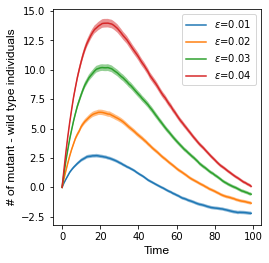

In [22]:
#Calculates the difference in number of survivors between hypothetical wild type and mutant across the given time span 

nind = 1000
nrepeats = 1000
Tmax = 100

kappa = 0.033
alpha = 0.000222

epsilon = np.array([0.01, 0.02, 0.03, 0.04])
p_wt = np.array([0.03893939, 0.03933673, 0.039742268,0.04015625]) # based on previous least-squares fitting: (1-epsilon)p_wt = 0.0385499

mut_wild_all = np.zeros((4*nrepeats,Tmax))
hyp_wt_all = np.zeros((4*nrepeats,Tmax))
diff_mutwt = np.zeros((nrepeats,Tmax))

counter1 = 0
counter2 = 0

C = np.arange(0,Tmax,1,dtype = int)
fig1,ax = plt.subplots(figsize=(6,6))

for m in range(4):
    mut_wild = np.zeros((nrepeats,Tmax),dtype = int)
    hyp_wt = np.zeros((nrepeats,Tmax),dtype = int)
    for k in range(nrepeats):
        counter1 = counter1 + 1
        counter2 = counter2 + 1
        s1 = np.ones((Tmax,nind),dtype = int)
        s2 = np.ones((Tmax,nind),dtype = int); 
        for j in range(1,Tmax):
            for i in range(nind):
                ran = np.random.rand(1)
                if s1[j-1,i] == 1:
                    if ran < (1-epsilon[m])*p_wt[m] + alpha*(((1+kappa)**(j+1))-1):
                        s1[j,i] = 0
                if s1[j-1,i] == 0:
                    s1[j,i] = 0
                
                if s2[j-1,i] == 1:
                    if ran < p_wt[m]:
                        s2[j,i] = 0
                if s2[j-1,i] == 0:
                    s2[j,i] = 0
        
        mut_wild[k,:] = np.sum(s1, axis = 1)
        mut_wild_all[counter1-1,:] = np.sum(s1, axis = 1) # to be used for making Figure 3 (fitness calculations)
    
        hyp_wt[k,:] = np.sum(s2, axis = 1)
        hyp_wt_all[counter2-1,:] = np.sum(s2, axis = 1) # to be used for making Figure 3 (fitness calculations)
    
        diff_mutwt[k,:] = mut_wild[k,:] - hyp_wt[k,:]
                
    
    #Calculate the difference in number of survivors between hypothetical wild type and mutant across the time span
    mean_diff = np.mean(diff_mutwt,axis = 0)
    std_diff = np.std(diff_mutwt,axis =0 )
   
    # Plotting
    if m==0:
        l1, = ax.plot(C,mean_diff)
        ax.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats), mean_diff+3.0*std_diff/np.sqrt(nrepeats), alpha = 0.5)
    if m==1:
        l2, = ax.plot(C,mean_diff)
        ax.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats), mean_diff+3.0*std_diff/np.sqrt(nrepeats), alpha = 0.5)
    if m==2:
        l3, = ax.plot(C,mean_diff)
        ax.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats), mean_diff+3.0*std_diff/np.sqrt(nrepeats), alpha = 0.5)
    if m==3:
        l4, = ax.plot(C,mean_diff)
        ax.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats), mean_diff+3.0*std_diff/np.sqrt(nrepeats), alpha = 0.5)

ax.legend((l1,l2,l3,l4),('$\epsilon$=0.01', '$\epsilon$=0.02', '$\epsilon$=0.03','$\epsilon$=0.04'));
afont = {'fontname':'Arial'}
ax.set_xlabel("Time",fontsize = 12,**afont);
ax.set_ylabel("# of mutant - wild type individuals",fontsize = 12,**afont);

x_size = 10
plt.rc('xtick',labelsize=x_size)
y_size = 10
plt.rc('ytick',labelsize=y_size)

fig1.tight_layout()

figure = plt.gcf()
figure.set_size_inches(3.42, 3.42)
plt.savefig('RA_PNAS_fig2_Frontinella.pdf', dpi = 1200, bbox_inches="tight");

In [28]:
#Calculates the difference in number of survivors between wild type and mutant across the time span 
# by integrating the areas under the survivirship curves where both mutant and the hypothetical wildtype uses the same ran value 

from numpy import trapz

nind = 1000
nrepeats =  1000
Tmax = 100

kappa = 0.033
alpha = 0.000222

epsilon = np.array([0, 0.01, 0.02, 0.03, 0.04])
p_wt = np.array([0.0385499, 0.03893939, 0.03933673, 0.039742268,0.04015625])


area_mut_wild = np.zeros((5,nrepeats))
area_hyp_wt = np.zeros((5,nrepeats))
for m in range(5):
    
    mut_wild = np.zeros((nrepeats,Tmax),dtype = int)
    hyp_wt = np.zeros((nrepeats,Tmax),dtype = int)
    
    for k in range(nrepeats):
        s1 = np.ones((Tmax,nind),dtype = int)
        s2 = np.ones((Tmax,nind),dtype = int) 
        for j in range(1,Tmax):
            for i in range(nind):
                ran = np.random.rand(1)
                if s1[j-1,i] == 1:
                    if ran < (1-epsilon[m])*p_wt[m] + alpha*(((1+kappa)**(j+1))-1):
                        s1[j,i] = 0
                if s1[j-1,i] == 0:
                    s1[j,i] = 0
                
                if s2[j-1,i] == 1:
                    if ran < p_wt[m]:
                        s2[j,i] = 0
                if s2[j-1,i] == 0:
                    s2[j,i] = 0
        
        # Integrate areas
        mut_wild[k,:] = np.sum(s1, axis = 1)
        y = mut_wild[k,:]
        area_mut_wild[m,k] = trapz(y, dx=1)
        
    
        hyp_wt[k,:] = np.sum(s2, axis = 1)
        y = hyp_wt[k,:]
        area_hyp_wt[m,k] = trapz(y, dx=1)
        
        
#Calculate the percentage of cases where the mutant has a larger area than the hypothetical wild type
Z = np.subtract(area_mut_wild,area_hyp_wt)
Y = Z.transpose()
G = np.count_nonzero(Y>0,axis=0)
R = G*100/nrepeats
print('Percentage mutant wins: ',R)
print('Number of mutant winning instances:', np.count_nonzero(Y>0,axis=0))        

Percentage mutant wins:  [  0.   59.6  99.4 100.  100. ]
Number of mutant winning instances: [   0  596  994 1000 1000]


# Figure 3 in paper

### r and R0 calculations for wild type and mutant

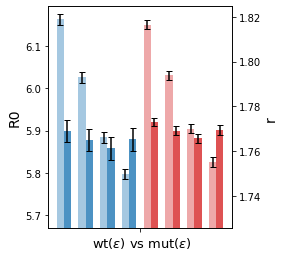

In [41]:
# Calculate r and R0 values for wild type and mutant for the four epsilon values
# Using H1_mut_all and H1_wt_all calculated in the snippet above with nrepeats_mut = 1000 for three different epsilon values

#Taken from: https://scipython.com/book/chapter-8-scipy/examples/solving-the-euler-lotka-equation/
from scipy.optimize import brentq
x = np.linspace(1, int(Tmax), 1)                                                   
def func(r):
    return np.sum(f * np.exp(-r * x)) - 1

Tmax = 100
nind = 1000
nrepeats = 1000 

# Hypothetical wild type   @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Initializations wild type             
R0_wt_const = np.zeros(4*nrepeats)
r_wt_const = np.zeros(4*nrepeats)

mean_R0_wt_const = np.zeros(4)
std_R0_wt_const = np.zeros(4)
sem_R0_wt_const = np.zeros(4)
mean_r_wt_const = np.zeros(4)
std_r_wt_const = np.zeros(4)
sem_r_wt_const = np.zeros(4)

# Fecundity functions hypothetical wild type
m_wt_const = np.zeros((4*nrepeats,Tmax))
fert_wt_const = np.zeros((4,Tmax))
counter = 0
for z in range(4):
    fert_wt_const[z,39] = 24.0  #check
    fert_wt_const[z,79] = 24.0 
    for s in range(nrepeats):
        counter = counter + 1
        m_wt_const[counter-1,:] = fert_wt_const[z,:]
f_wt_const = np.multiply(hyp_wt_all*(1/nind),m_wt_const)

# Calculate mean, std and sem for R0 and r for hypothetical wild type
for i in range(4*nrepeats):
    R0_wt_const[i] = np.sum(f_wt_const[i,:])
    
    a, b = -2, 8 
    f = f_wt_const[i,:]
    r = brentq(func, a, b)
    r_wt_const[i] = r
    

# Calculate mean, std and sem for R0 and r for every nrepeats chunk for hypothetical wildtype (for each epsilon value)
for k in range(4):
    mean_R0_wt_const[k] = np.mean(R0_wt_const[k*nrepeats:k*nrepeats+(nrepeats-1)])
    std_R0_wt_const[k] = np.std(R0_wt_const[k*nrepeats:k*nrepeats+(nrepeats-1)])
    sem_R0_wt_const[k] = np.std(R0_wt_const[k*nrepeats:k*nrepeats+(nrepeats-1)])/math.sqrt(nrepeats)
    mean_r_wt_const[k] = np.mean(r_wt_const[k*nrepeats:k*nrepeats+(nrepeats-1)])
    std_r_wt_const[k] = np.std(r_wt_const[k*nrepeats:k*nrepeats+(nrepeats-1)])
    sem_r_wt_const[k] = np.std(r_wt_const[k*nrepeats:k*nrepeats+(nrepeats-1)])/math.sqrt(nrepeats)


# Mutant @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Initializations mutant
R0_mut_const = np.zeros(4*nrepeats)
r_mut_const = np.zeros(4*nrepeats)

mean_R0_mut_const = np.zeros(4)
std_R0_mut_const = np.zeros(4)
sem_R0_mut_const = np.zeros(4)
mean_r_mut_const = np.zeros(4)
std_r_mut_const = np.zeros(4)
sem_r_mut_const = np.zeros(4)

# Fecundity functions mutant
m_mut_const = np.zeros((4*nrepeats,Tmax))
#m_mut_var = np.zeros((3*nrepeats_mut,Tmax))
fert_mut_const = np.zeros((4,Tmax))
counter = 0
for z in range(4):
    fert_mut_const[z,39] = 24.0
    fert_mut_const[z,79] = 18.0 
    for s in range(nrepeats):
        counter = counter + 1
        m_mut_const[counter-1,:] = fert_mut_const[z,:]
f_mut_const = np.multiply(mut_wild_all*(1/nind),m_mut_const)


# Calculate mean, std and sem for R0 and r for the mutant 
# Calculate R0 and r for all instances
for i in range(4*nrepeats):
    R0_mut_const[i] = np.sum(f_mut_const[i,:])
    
    a, b = -2, 8
    f = f_mut_const[i,:]
    r = brentq(func, a, b)
    r_mut_const[i] = r

# Calculate mean, std and sem for R0 and r for every nrepeats chunk for mutant (for each epsilon value)
for k in range(4):
    mean_R0_mut_const[k] = np.mean(R0_mut_const[k*nrepeats:k*nrepeats+(nrepeats-1)])
    std_R0_mut_const[k] = np.std(R0_mut_const[k*nrepeats:k*nrepeats+(nrepeats-1)])
    sem_R0_mut_const[k] = np.std(R0_mut_const[k*nrepeats:k*nrepeats+(nrepeats-1)])/math.sqrt(nrepeats_mut)
    mean_r_mut_const[k] = np.mean(r_mut_const[k*nrepeats:k*nrepeats+(nrepeats-1)])
    std_r_mut_const[k] = np.std(r_mut_const[k*nrepeats_mut:k*nrepeats+(nrepeats-1)])
    sem_r_mut_const[k] = np.std(r_mut_const[k*nrepeats:k*nrepeats+(nrepeats-1)])/math.sqrt(nrepeats)

    
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

#Matplotlib's default ten color circles: {‘C0’, ‘C1’, ‘C2’, ‘C3’, ‘C4’, ‘C5’, ‘C6’, ‘C7’, ‘C8’, ‘C9’}. This is the color used sequentially in matplotlib plots by default.
# https://matplotlib.org/3.1.1/users/dflt_style_changes.html
#https://matplotlib.org/3.3.3/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

    
#Plotting Fig 3
y1_pos = np.array([0,3,6,9])
y2_pos = np.array([1,4,7,10])
y3_pos = np.array([2,5,8,11])

y4_pos = np.array([12,15,18,21])
y5_pos = np.array([13,16,19,22])
y6_pos = np.array([14,17,20])

y7_pos =[11] #[4,12]
dummy_R0 = np.zeros(4)
dummy_r = np.zeros(3)

fig,ax1 = plt.subplots(figsize=(6,6))

ax1.bar(y1_pos,mean_R0_wt_const,width = 1.0,yerr=sem_R0_wt_const, align='center', alpha=0.4, ecolor='black', capsize=3, color = 'C0');
ax1.bar(y2_pos,mean_R0_mut_const,width = 1.0,yerr=sem_R0_mut_const, align='center', alpha=0.8, ecolor='black', capsize=3, color = 'C0');
ax1.bar(y3_pos,dummy_R0,width=0.3,color = 'w') #The width spec does not seem to work. width only refers to the relative width in the slot..

ax1.set_ylabel('R0',fontsize=14);
ax1.set_ylim(0.92*mean_R0_wt_const[0],1.005*mean_R0_wt_const[0])

ax2 = ax1.twinx()

ax2.bar(y4_pos,mean_r_wt_const,width = 1.0,yerr=sem_r_wt_const, align='center', alpha=0.4, ecolor='black', capsize=3,color = 'C3');
ax2.bar(y5_pos,mean_r_mut_const,width = 1.0,yerr=sem_r_mut_const, align='center', alpha=0.8, ecolor='black', capsize=3,color = 'C3');
ax2.bar(y6_pos,dummy_r,width=0.3,color = 'w') 

ax2.set_ylabel('r ',fontsize=14);
ax2.set_ylim(0.95*mean_r_wt_const[0],1.0045*mean_r_wt_const[0])

ax2.set_xticks(y7_pos);

xticks = [' wt($\epsilon$) vs mut($\epsilon$)']
ax1.set_xticklabels(xticks, fontsize=13);

fig.tight_layout()

figure = plt.gcf()
figure.set_size_inches(3.42, 3.42)
#plt.savefig('RA_PNAS_fig3_Frontinella.pdf', dpi = 1200, bbox_inches="tight");

Tested second egg batch for mutant = 24, like wild type. Results then corresponds to Fig.2, i.e. the reduced second egg batch due to senescence causes that one must up to above 3%.

In [37]:
# Percentage difference in R0 when epsilon = 0.04
(mean_R0_mut_const[3] - mean_R0_wt_const[3])*100/mean_R0_wt_const[3]

1.4100614493426333

In [38]:
# Percentage difference in r when epsilon = 0.04
(mean_r_mut_const[3] - mean_r_wt_const[3])*100/mean_r_wt_const[3]

0.8151568136799129

## Test of the correspondence between Eq. 8 and the Gompertz hazard rate function

In [ ]:
# Test of the correspondence between Eq. 8 and the Gompertz hazard rate function
nind = 1000
nrepeats = 1000
Tmax_C = 217
alpha = 0.000222 
kappa = 0.033 

#Eq. 8 in ms
mut_C = np.zeros((nrepeats,Tmax_C),dtype = int)
for k in range(nrepeats):
    s = np.ones((Tmax_C,nind),dtype = int); 
    for j in range(1,Tmax_C):
        for i in range(nind):
            ran = np.random.rand(1)
            if s[j-1,i] == 1:
                if ran < alpha*(((1+kappa)**(j+1))-1):
                    s[j,i] = 0
            if s[j-1,i] == 0:
                s[j,i] = 0
    mut_C[k,:] = np.sum(s, axis = 1)

mean_mut_C = np.mean(mut_C,axis = 0)

#Gompertz hazard rate function
alpha_G = alpha*(1+kappa)

mut_C_G = np.zeros((nrepeats,Tmax_C),dtype = int)
for k in range(nrepeats):
    s = np.ones((Tmax_C,nind),dtype = int); 
    for j in range(1,Tmax_C):
        for i in range(nind):
            ran = np.random.rand(1)
            if s[j-1,i] == 1:
                if ran < alpha_G*math.exp(math.log(1+kappa)*j): #-alpha:
                    s[j,i] = 0
            if s[j-1,i] == 0:
                s[j,i] = 0
    mut_C_G[k,:] = np.sum(s, axis = 1)

mean_mut_C_G = np.mean(mut_C_G,axis = 0)

np.set_printoptions(suppress=True)
(mean_mut_C_G-mean_mut_C)*100/mean_mut_C

array([ 0.        , -0.02190048, -0.04410203, -0.06840472, -0.09071052,
       -0.11031798, -0.12982999, -0.15394588, -0.17536717, -0.19759129,
       -0.21662196, -0.24026218, -0.26580839, -0.28805752, -0.31112263,
       -0.33750095, -0.35858696, -0.380489  , -0.40199626, -0.42591477,
       -0.4498582 , -0.47451749, -0.49379027, -0.51448068, -0.53918171,
       -0.56320702, -0.58767911, -0.60805655, -0.6311664 , -0.65299389,
       -0.6780581 , -0.69654493, -0.71405003, -0.73821201, -0.76383225,
       -0.78739206, -0.80764486, -0.83390228, -0.85987698, -0.87194275,
       -0.89327839, -0.91376685, -0.93431567, -0.95603011, -0.97962442,
       -1.00056065, -1.0146804 , -1.04140644, -1.05719484, -1.08033593,
       -1.09592891, -1.12119507, -1.15204035, -1.17935777, -1.20365031,
       -1.22843182, -1.25049188, -1.27279592, -1.29541504, -1.31618879,
       -1.34206064, -1.36225165, -1.37793018, -1.39118701, -1.41595819,
       -1.44138981, -1.45551854, -1.47823233, -1.49318546, -1.50995655,
       -1.52270698, -1.54984053, -1.58504822, -1.6121309 , -1.63997505,
       -1.6638958 , -1.6836984 , -1.70227812, -1.73562843, -1.76097653,
       -1.79366035, -1.81298254, -1.82074644, -1.84831669, -1.86140405,
       -1.88088561, -1.89852632, -1.90459447, -1.93367942, -1.94781542,
       -1.96543808, -1.98183172, -2.00767413, -2.0328614 , -2.05575709,
       -2.08589878, -2.11171281, -2.13031603, -2.15412327, -2.15855655,
       -2.19285597, -2.19934598, -2.22257935, -2.24129341, -2.26323411,
       -2.29352271, -2.32010201, -2.34623244, -2.37593652, -2.40589097,
       -2.42993459, -2.43527844, -2.44226631, -2.43692075, -2.47353896,
       -2.49926465, -2.55134701, -2.55548119, -2.56959488, -2.59429177,
       -2.60272765, -2.60988915, -2.64984983, -2.63486271, -2.68124186,
       -2.70528741, -2.75655593, -2.74842265, -2.75544596, -2.79101366,
       -2.81357321, -2.83370022, -2.84180525, -2.86208193, -2.86567295,
       -2.861736  , -2.92430922, -2.96965738, -3.01009799, -2.99457763,
       -3.0088203 , -3.06653584, -3.10303402, -3.11741221, -3.09707625,
       -3.10099451, -3.14862736, -3.22632424, -3.21260392, -3.27431743,
       -3.27020168, -3.23567359, -3.30198965, -3.33326093, -3.31753421,
       -3.35320309, -3.3454407 , -3.33874304, -3.37782247, -3.40401653,
       -3.42788467, -3.43707643, -3.34063718, -3.35597997, -3.43865775,
       -3.51294762, -3.51900356, -3.56700816, -3.52951062, -3.60072192,
       -3.56610609, -3.66324672, -3.73183554, -3.70747041, -3.75010447,
       -4.06570809, -4.19927334, -4.16592135, -4.23208954, -4.25517886,
       -4.41947476, -4.76054732, -4.87339356, -4.7785638 , -4.75615357,
       -4.84169928, -5.15463918, -5.33119413, -5.67249376, -5.22780541,
       -4.79311231, -5.29511693, -5.52039525, -5.54860822, -5.54023964,
       -5.95788705, -6.42922246, -6.23783258, -6.05688368, -6.28115653,
       -7.14285714, -7.32498841, -7.48211993, -8.09033107, -7.15990453,
       -7.16601816, -8.15281607, -8.75842156, -6.69914738, -5.95054096,
       -6.17042116, -2.29299363, -5.69105691, -3.00429185, -5.20547945,
       -4.72727273, -6.56565657])